<a href="https://colab.research.google.com/github/ABYA80/US-Accidents-Analysis/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#US Accidents Edxploratory Data Analysis 

`The dataset doesn't contain New York City or State. `

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/DSDA"

In [ ]:
%cd /content/gdrive/My Drive/DSDA

/content/gdrive/My Drive/DSDA


In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

kaggle.json  US_Accidents_Dec20_Updated.csv  us-accidents.zip


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  us-accidents.zip
replace US_Accidents_Dec20_Updated.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


#Importing All Necessary Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

#Data Preparation and Data Cleaning

1. Load the file using Pandas.
2. Look for some information about data & the columns.
3. Fix any missing or incorrect values

###Reading the CSV file

In [ ]:
data = pd.read_csv('US_Accidents_Dec20_Updated.csv')

In [ ]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


###Exploring dataset info

In [ ]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = data.select_dtypes(include=numerics)
len(numeric_df.columns)

14

###Fix any missing or incorrect values

In [ ]:
missing_percentages = data.isna().sum().sort_values(ascending=False) * 100 / len(data) 
missing_percentages

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
Amenity                   0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description         

In [ ]:
type(missing_percentages)

pandas.core.series.Series

In [ ]:
missing_percentages[missing_percentages != 0]

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
dtype: float64

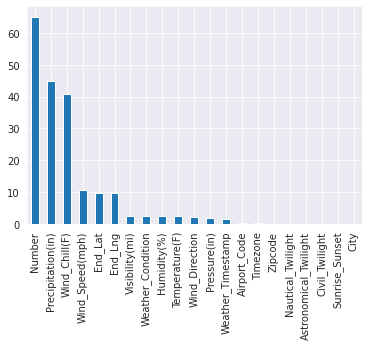

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind = 'bar')

In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#Exploratory Data Analysis

Columns we'll analyze:
1. City
2. Start Time
3. Start Lat, Start Lan
4. Temperature
5. Weather Condition

#Asking Questions

1. Are there more accidents in warmer or colder area?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York Show up in the data? If yes, why is the count lower for most populated city?
4. Among the top 100 cities in the number of accidents, which states do they belong to most frequently?
5. What time of the date accidents are more frequent in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of the accidents year over year (Decrease/Increase)?
9. When is accidents per unit of traffic the highest?

### City Column

In [ ]:
cities = data.City.unique()
len(cities)

11790

In [ ]:
cities_by_accident = data.City.value_counts()
cities_by_accident

Los Angeles         68411
Houston             68265
Charlotte           56176
Miami               49965
Dallas              48525
                    ...  
Magnolia Springs        1
Heart Butte             1
South Hampton           1
Shannock                1
Otranto                 1
Name: City, Length: 11789, dtype: int64

In [ ]:
'New York' in data.City

False

In [ ]:
'NY' in data.State

False

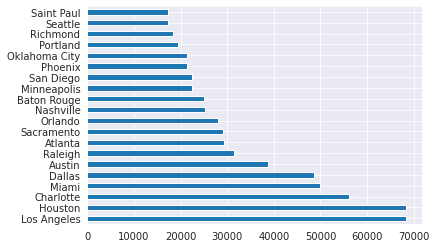

In [ ]:
cities_by_accident[:20].plot(kind='barh')

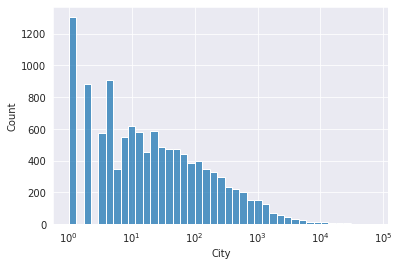

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
high_accidents = cities_by_accident[cities_by_accident > 1000]
low_accidents = cities_by_accident[cities_by_accident < 1000]

In [ ]:
len(high_accidents) * 100 / len(cities_by_accident)

4.3515141233353125

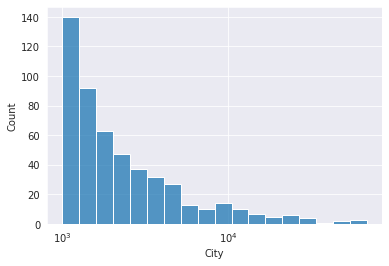

In [ ]:
sns.histplot(high_accidents, log_scale=True)

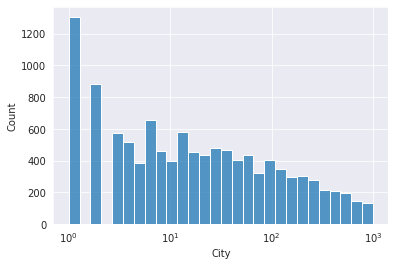

In [ ]:
sns.histplot(low_accidents, log_scale=True)

### Start Time

In [ ]:
data.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [ ]:
data.Start_Time = pd.to_datetime(data.Start_Time)

In [ ]:
data.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [ ]:
data['hour'] = data.Start_Time.dt.hour
data['hour'].head()

0     8
1    17
2    21
3    16
4    17
Name: hour, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


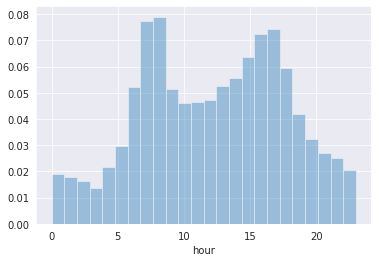

In [ ]:
sns.distplot(data.hour, bins = 24, kde=False, norm_hist=True)

- A high percentage of accident occur between 6 AM - 10 AM (Could be because people are in hurry to get to work).
- Next highest is 3 PM - 8 PM.

In [ ]:
data['day'] = data.Start_Time.dt.dayofweek
data['day'].head()

0    1
1    0
2    6
3    1
4    2
Name: day, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


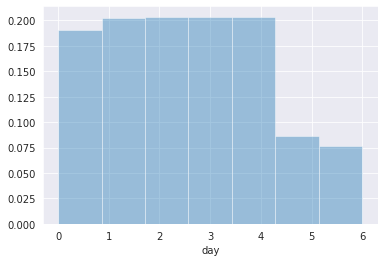

In [ ]:
sns.distplot(data.day, bins = 7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays?

In [ ]:
saturdays = data.Start_Time[data.Start_Time.dt.dayofweek == 5]
sundays = data.Start_Time[data.Start_Time.dt.dayofweek == 6]
mondays = data.Start_Time[data.Start_Time.dt.dayofweek == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


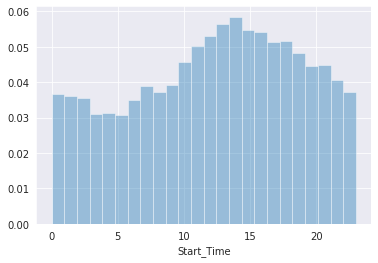

In [ ]:
sns.distplot(sundays.dt.hour, bins = 24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


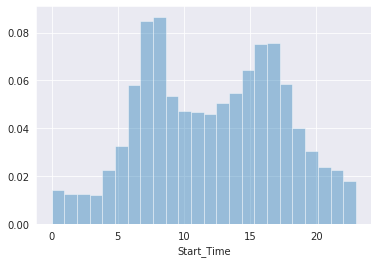

In [ ]:
sns.distplot(mondays.dt.hour, bins = 24, kde=False, norm_hist=True)

- On sundays, the peak occurs between 10 AM - 3 PM, unlike weekdays

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


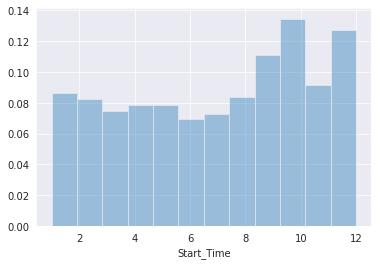

In [ ]:
data_2019 = data[data.Start_Time.dt.year == 2019]
sns.distplot(data_2019.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)

Explanation for the trend -
- Histogram is for year 2019 because in 2016 & 2017 data wasn't complete in some months we didn't have any data. For Example - there was no data for August 2016.
- Oct, Nov, and Dec has the highest accidents since these months are holiday months, and people travel a lot in those months to visit their families. In Jan Accidents are a lot but also declining since people returns to their homes.
- Accidents in winter months could also be higher because of snowstorm, fog or any kind of winter storm. Accidents in summer months is low since, these months have clear weather.

### Start Latitude & Longitude

In [ ]:
data[['Start_Lat', 'Start_Lng']]

,Start_Lat,Start_Lng
0,34.808868,-82.269157
1,35.090080,-80.745560
2,37.145730,-121.985052
3,39.110390,-119.773781
4,26.102942,-80.265091
...,...,...
2906605,29.813824,-95.399437
2906606,34.068890,-117.342010
2906607,25.702200,-80.335556
2906608,40.660140,-111.952460


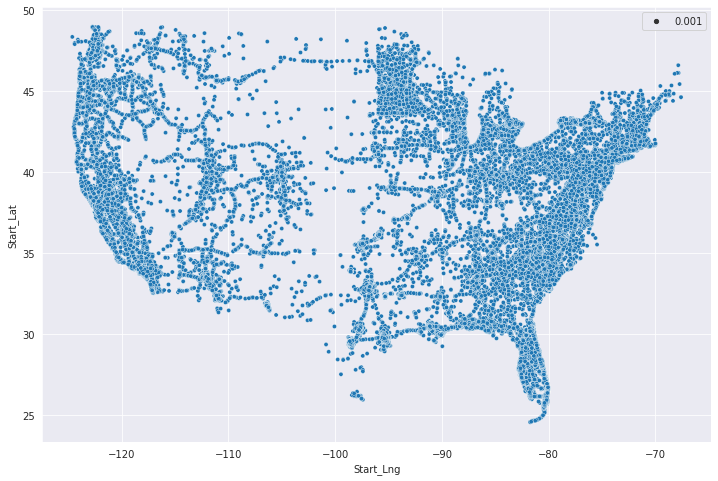

In [ ]:
sample_data = data.sample(int(0.1 * len(data)))
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(ax = ax, x = sample_data.Start_Lng, y = sample_data.Start_Lat, size = 0.001)

In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_data = data.sample(int(0.001 * len(data)))
lat_lon_pairs = list(zip(list(sample_data.Start_Lat), list(sample_data.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# Summary and Conclusion


Insights:
- No Data from New York.
- The number of accidents per city decreases exponantially.
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident.